In [ ]:
#Import all the python tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats

# for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [1]:
# Load Dataset and do some quick checks
from google.colab import files
uploaded = files.upload()

Saving updated_house_data.csv to updated_house_data.csv


In [ ]:
#Quick Checks
df = pd.read_csv('updated_house_data.csv')
print("Shape:", df.shape)
print("\nInfo:", df.info())
print("\nStatistics:", df.describe().T)

Shape: (1460, 82)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1460 non-null   int64  
 1   MSSubClass          1460 non-null   int64  
 2   MSZoning            1460 non-null   object 
 3   LotFrontage         1201 non-null   float64
 4   LotArea             1460 non-null   int64  
 5   Street              1460 non-null   object 
 6   Alley               91 non-null     object 
 7   LotShape            1460 non-null   object 
 8   LandContour         1460 non-null   object 
 9   Utilities           1460 non-null   object 
 10  LotConfig           1460 non-null   object 
 11  LandSlope           1460 non-null   object 
 12  Neighborhood        1460 non-null   object 
 13  Condition1          1460 non-null   object 
 14  Condition2          1460 non-null   object 
 15  BldgType            1460 non-null   o

In [ ]:
df.head()
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice Category
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,Average Price
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,Expensive
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,Expensive
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,...,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125,Average Price
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,...,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500,Average Price


In [ ]:
#Identify Missing Values and pick predictor + target
target = "SalePrice"
feature = "GrLivArea"

#Missing Values per column
Missing = df.isnull().sum().sort_values(ascending=False)
display(Missing[Missing > 0].head(10)) # Show top columns with missing values
print(Missing)

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageQual,81
GarageYrBlt,81
GarageFinish,81


PoolQC                1453
MiscFeature           1406
Alley                 1369
Fence                 1179
MasVnrType             872
                      ... 
YrSold                   0
SaleType                 0
SaleCondition            0
SalePrice                0
SalePrice Category       0
Length: 82, dtype: int64


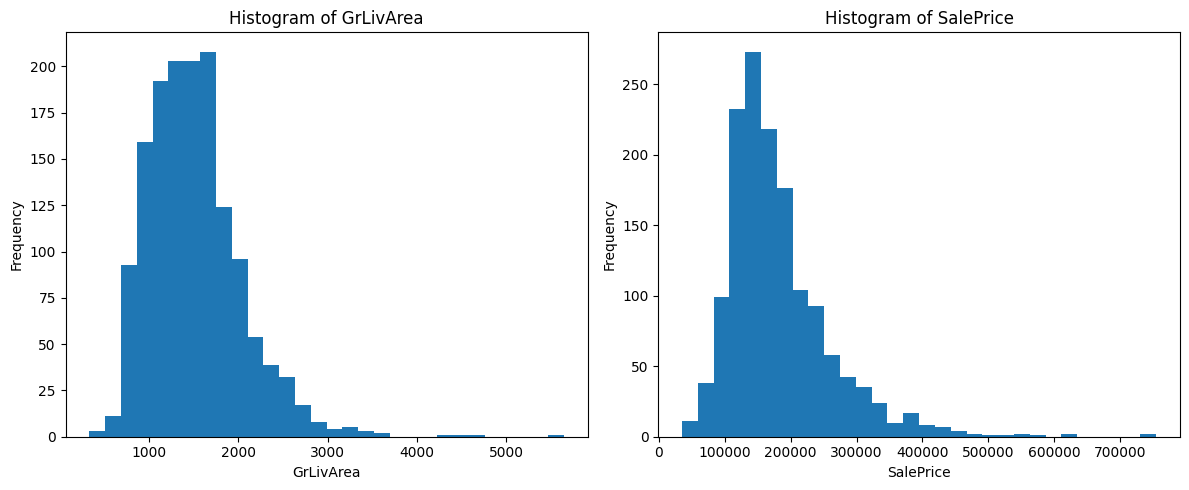

In [ ]:
# Histogram for feature and SalePrice(target)
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
#Plot predictor distribution
plt.hist(df[feature].dropna(), bins=30)
plt.title(f"Histogram of {feature}")
plt.xlabel(feature)
plt.ylabel("Frequency")

plt.subplot(1,2,2)
#Plot target distribution
plt.hist(df[target].dropna(), bins=30)
plt.title(f"Histogram of {target}")
plt.xlabel(target)
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


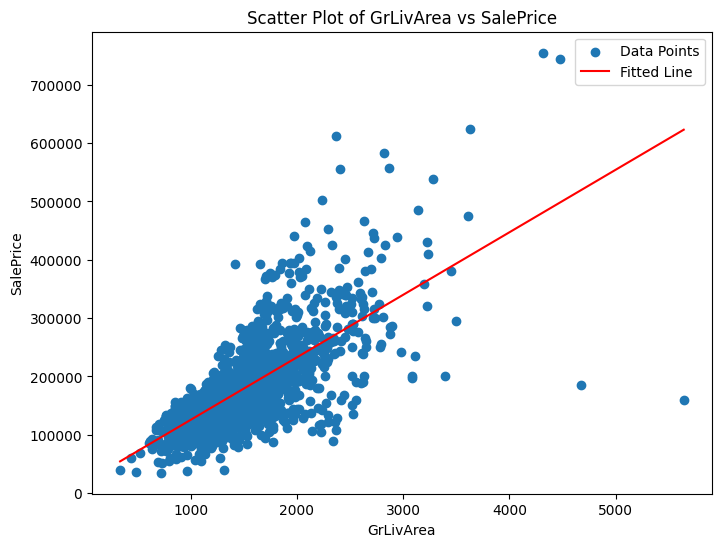

In [ ]:
# ScatterPlot of feature vs SalePrice with fitted line for visualization
mask = df[[feature, target]].dropna()
X_viz = mask[feature].values.reshape(-1,1)
y_viz = mask[target].values

#Fit a linear model just for the plotted line (not for our final visualization)
lr_Vis = LinearRegression()
lr_Vis.fit(X_viz, y_viz)

#Create grid for line
x_grid = np.linspace(X_viz.min(), X_viz.max(), 200).reshape(-1,1)
y_grid = lr_Vis.predict(x_grid)

#Plot
plt.figure(figsize=(8,6))
plt.scatter(df[feature], df[target], label='Data Points')
plt.plot(x_grid, y_grid, color='red', label='Fitted Line')
plt.title(f"Scatter Plot of {feature} vs {target}")
plt.xlabel(feature)
plt.ylabel(target)
plt.legend()
plt.show()

In [14]:
#Prepare modelling dataset (drop missing rows for columns)
data = df[[feature, target]].dropna().copy()
print("Rows available for modelling:", data.shape[0])

#Detect outliers in the feature using IQR (Interquartile Range) method
Q1 = data[feature].quantile(0.25)
Q3 = data[feature].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Identify and remove outliers
outliers = data[(data[feature] < lower_bound) & (data[feature] > upper_bound)]
print(f"Outliers detected: {data.shape[0] - outliers.shape[0]}")
data_no_outliers = data[data[feature].between(lower_bound, upper_bound, inclusive='both')]
print(f"Rows after removing outliers: {data_no_outliers.shape[0]}")

Rows available for modelling: 1460
Outliers detected: 1460
Rows after removing outliers: 1429


In [16]:
#Train/Test split and linear Regression (original SalePrice)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = data_no_outliers[feature].values.reshape(-1,1)
y = data_no_outliers[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

lr = LinearRegression()
lr.fit(X_train, y_train)

#Coefficient and intercept
print("Coefficient (slope:):", lr.coef_[0])
print("Intercept:", lr.intercept_)

#Predictions
y_pred = lr.predict(X_test)

#Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE : {mae:.2f}")
print(f"MSE : {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2  : {r2:.4f}")

Coefficient (slope:): 113.61047335086552
Intercept: 10002.284835166589
MAE : 38054.64
MSE : 2767217489.65
RMSE: 52604.35
R2  : 0.4179


In [23]:
#Apply log transformation to the target variable
y_log = np.log1p(y)

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=RANDOM_STATE)

#Train linear regression model on log-transformed target
lr_log = LinearRegression()
lr_log.fit(X_train_log, y_train_log)

#Predictions on log-transformed target
y_pred_log = lr_log.predict(X_test_log)

#Metrics for log-transformed target
mae_log = mean_absolute_error(y_test_log, y_pred_log)
mse_log = mean_squared_error(y_test_log, y_pred_log)
rmse_log = np.sqrt(mse_log)
r2_log = r2_score(y_test_log, y_pred_log)

print("Metrics for log-transformed SalePrice:")
print(f"MAE : {mae_log:.4f}")
print(f"MSE : {mse_log:.4f}")
print(f"RMSE: {rmse_log:.4f}")
print(f"R2  : {r2_log:.4f}")

#Back-transform predictions to original scale for comparison
y_pred_exp = np.expm1(y_pred_log)

#Metrics on back-transformed predictions (on original scale)
mae_exp = mean_absolute_error(y_test, y_pred_exp) # Note: using original y_test
mse_exp = mean_squared_error(y_test, y_pred_exp)
rmse_exp = np.sqrt(mse_exp)
r2_exp = r2_score(y_test, y_pred_exp) # Note: using original y_test

print("\nMetrics for back-transformed predictions (on original SalePrice scale):")
print(f"MAE : {mae_exp:.2f}")
print(f"MSE : {mse_exp:.2f}")
print(f"RMSE: {rmse_exp:.2f}")
print(f"R2  : {r2_exp:.4f}")

Metrics for log-transformed SalePrice:
MAE : 0.2144
MSE : 0.0825
RMSE: 0.2872
R2  : 0.4166

Metrics for back-transformed predictions (on original SalePrice scale):
MAE : 38342.17
MSE : 2848891924.52
RMSE: 53375.01
R2  : 0.4007


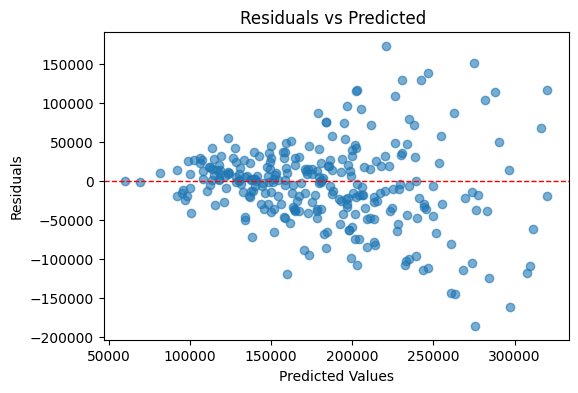

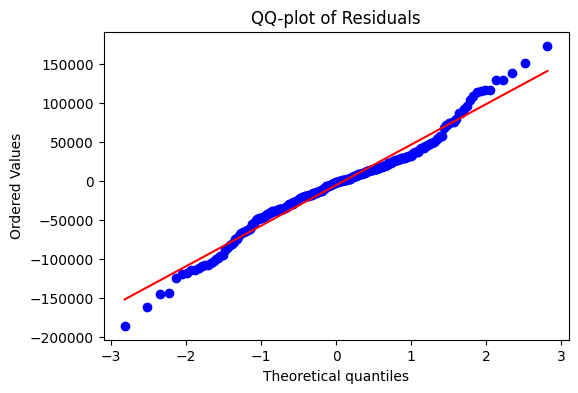

In [18]:
#Residual Diagnostics
residuals = y_test - y_pred

#Residual vs Predicted(to check homoscedasticity)
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha= 0.6)
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted ")
plt.show()

#QQ-plot of residuals ( to check normality)
plt.figure(figsize=(6,4))
stats.probplot(residuals, plot=plt)
plt.title("QQ-plot of Residuals")
plt.show()


In [22]:
#Saving the model and printing the final summary
import joblib
joblib.dump(lr, 'linear_regression_model.joblib')

print("MODEL SUMMARY")
print("Feature:", feature)
print("Target:", target)
print("Rows Used:{data_no_outliers.shape[0]}")
print("Model Coefficients:", lr.coef_[0])
print("Intercept:", lr.intercept_)

MODEL SUMMARY
Feature: GrLivArea
Target: SalePrice
Rows Used:{data_no_outliers.shape[0]}
Model Coefficients: 113.61047335086552
Intercept: 10002.284835166589


## Reflection Report

My short report can be accessed here:
[Reflection Report Link](https://docs.google.com/document/d/1B1D5cjkTKbdRqKMIdo9nYY4BXF6G5o21-nygy_3LCa0/edit?usp=sharing)